<a href="https://colab.research.google.com/github/Ad7amstein/Disease-Prediction/blob/main/Disease_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling for Disease Diagnosis
### Outline:

## Libraries

In [36]:
from pandas import read_csv
import seaborn as sns

### Data Loading

In [37]:
# URL's for which the data is stored
url_train_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/train_data.csv"
url_test_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/test_data.csv"

# Read the data as CSV files
train_data = read_csv(url_train_data)
test_data = read_csv(url_test_data)

### Data Summary

In [38]:
# Check the dimensions of the dataset
print(f"The shape of the train data: {train_data.shape}")
print(f"The shape of the test data: {test_data.shape}")

The shape of the train data: (2351, 25)
The shape of the test data: (486, 25)


In [39]:
# Display the first few rows
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [40]:
# Check some information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [41]:
# Check for missing values
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

<Axes: >

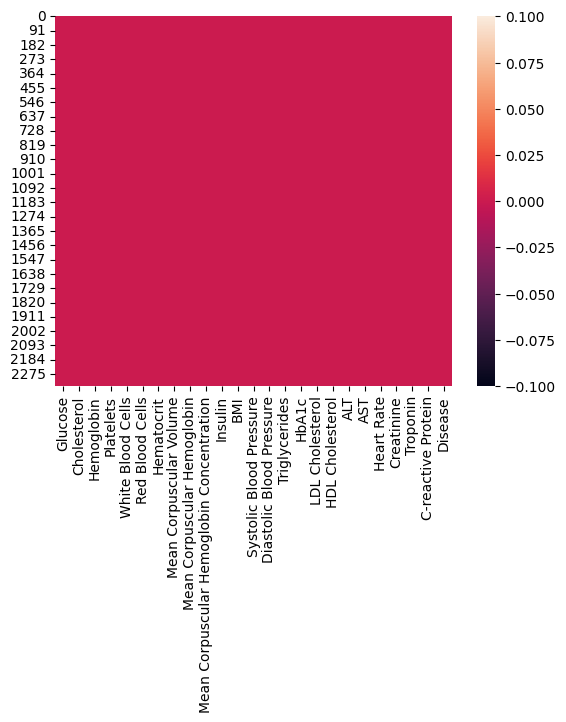

In [42]:
# let's see the distribution of the null values
sns.heatmap(train_data.isnull())

In [43]:
# Compute summary statistics for numerical features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


In [44]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

<Axes: xlabel='Disease'>

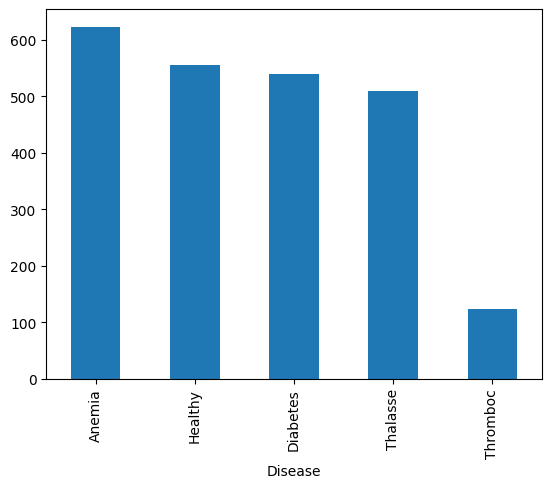

In [45]:
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

<Axes: xlabel='Disease'>

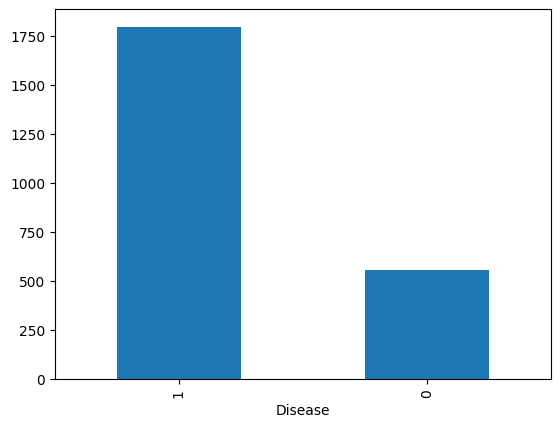

In [46]:
# Convert target to numerical values
train_data.Disease = [0 if value == "Healthy" else 1 for value in train_data.Disease]
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

In [47]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

Disease
1    1795
0     556
Name: count, dtype: int64